#### Name: Aamir Husain

# Deep learning from scratch
## Homework 3
### Exercise 1

-----

### General instructions

Complete the exercise listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells. 

### When submitting this homework:

Make sure you have put your name at the top of each file
    
Make sure all output is present in your notebook prior to submission

----

## <span style="color:#a50e3e;">Exercise 1. </span>   Build your own basic deep learning library!

We are now at the point where we have enough pieces of code - for optimization, cost functions, normalizers, feature transformations, etc., that we need to get organized so that we can use it more effectively.  This is where the notion of a coding *library* comes in - in `Python` this is called a *module* - which will help us organize our many snippets of code, and make all of our deep learning easier to use.  

In this exercise you will put together your own basic deep learning library (again, this is called a *module* in `Python`, if you have never heard of this concept learn more about it via Google!) using the functionality detailed in Chapters 6-13 of the text.  Getting all of these various files organized now will help us move forward much more effectively as we discuss and build new kinds of network architectures (feature transformations), optimization tricks, etc.

Your library should consist of a single directory called `my_first_DL_lib` that must include *at least* the following files:

1) `normalizers.py`: containing a standard normalizer (from e.g., 8.4)

2) `optimizers.py`: containing a gradient descent algorithm

3) `cost_functions.py`: containing a set of the common cost functions including: Least Squares, two-class softmax, and multiclass softmax costs (from Chapters 8 - 10)

4) `multilayer_perceptrons.py`: containing a general multilayer perceptron `feature_transforms` function (from 13.1)

5) `history_plotter.py`: containing a set of plotting tools for plotting cost function and misclassification histories from a run of any local optimization scheme

6) `__init__.py`: a blank `.py` file required in order for `Python` to recognize your directory of files as a `module` (see this helpful [Stack](https://stackoverflow.com/questions/448271/what-is-init-py-for) Q & A if you've never heard of this before!)

Build whatever kind of user-interface that allows you to easily interact with these functionalities.  To be clear, because you are wrapping up these files into a `Python` module, you should be able to *import* them like you would any other library.  So if you import your library as 

``import my_first_DL_lib as mylib``

then you should be able to use all files located inside of your `my_first_DL_lib` directory, e.g., your `optimizers.py` functionality as 

``mylib.optimizers``

Show off your library in this Jupyter notebook by performing nonlinear multiclass classification using the toy dataset shown below (located in *3eggs_multiclass.csv* in the datasets directory).  

<figure><img src="images/3eggs_multiclass.png" width="50%" height="auto"></figure>

In doing this you will

- choose your own MLP architecture (i.e., the number of layers and units per layer of your network `feature_transformation`)


- produce a misclassification and cost function history plot for your run of gradient descent

You should be able to perfectly classify this dataset in fewer than 500 steps of gradient descent if you have chosen a flexible enough network structure

Data Normalized as: standard
Feature transform: multilayer_perceptron
Activation: tanh
Layer sizes: [2, 10, 10, 10, 10, 4]
Cost function set to: multiclass_softmax
Using counter: multiclass_counter
Optimized with alpha = 0.1 @ 500 iterations


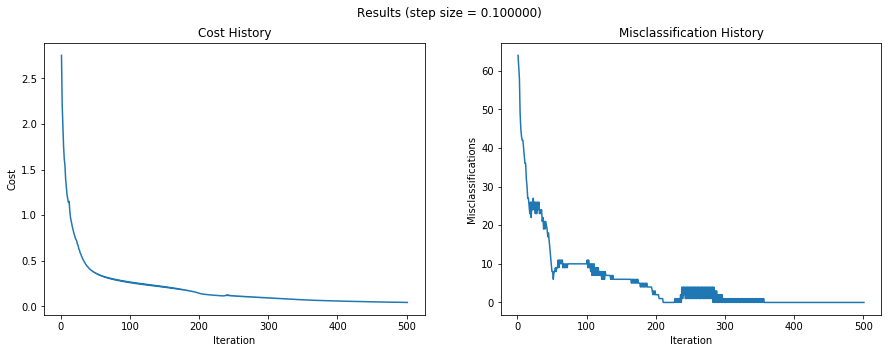

In [10]:
from dl_lib import deep_learner as DL
import autograd.numpy as np

csvname = "datasets/3eggs_multiclass.csv"
data = np.loadtxt(csvname, delimiter = ",")
data = data.T

x = data[:,:-1].T
y = data[:,-1:].T

learner = DL.Setup(x, y)
learner.choose_normalizer(name = 'standard')
N = 2
M = 4
layer_sizes = [N, 10, 10, 10,10, M]
learner.choose_features(name = 'multilayer_perceptron', layer_sizes = layer_sizes, activation = 'tanh', scale = 1)
learner.choose_cost(name = 'multiclass_softmax')
learner.optimize(max_its = 500, alpha_choice = 1)
learner.show_history()